# Notebook 01: Data Preparation & Integration

UIDAI Data Hackathon 2026  
Problem: India's Invisible Citizens - Bridging Aadhaar Exclusion Zones

---

## Objective
Load, clean, and integrate all 3 Aadhaar datasets:
1. Enrolment Data (approximately 1M records) - New registrations
2. Demographic Updates (approximately 2M records) - Address/name changes
3. Biometric Updates (approximately 1.8M records) - Fingerprint re-authentication

Output: Clean, merged datasets ready for analysis

---

## Table of Contents
1. Environment Setup
2. Data Loading
3. Data Cleaning
4. Feature Engineering
5. Data Integration
6. Summary Statistics

## 1. Environment Setup
Import libraries and configure settings

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Paths
DATA_DIR = '../dataset'
OUTPUT_DIR = '../outputs'

print(" Environment setup complete")
print(f" Data directory: {DATA_DIR}")
print(f" Output directory: {OUTPUT_DIR}")

 Environment setup complete
 Data directory: ../dataset
 Output directory: ../outputs


## 2. Data Loading

### 2.1 Load Enrolment Data
Files contain date, state, district, pincode, and age-wise enrollments (0-5, 5-17, 18+)

In [2]:
# Find all enrolment CSV files
enrolment_files = glob.glob(os.path.join(DATA_DIR, 'api_data_aadhar_enrolment', 
                                          'api_data_aadhar_enrolment', '*.csv'))

print(f" Found {len(enrolment_files)} enrolment files:")
for f in enrolment_files:
    print(f"  - {os.path.basename(f)}")

# Load and concatenate
df_enrol = pd.concat([pd.read_csv(f) for f in enrolment_files], ignore_index=True)

print(f"\n Loaded {len(df_enrol):,} enrolment records")
print(f" Columns: {list(df_enrol.columns)}")
print(f" Memory usage: {df_enrol.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

 Found 3 enrolment files:
  - api_data_aadhar_enrolment_0_500000.csv
  - api_data_aadhar_enrolment_1000000_1006029.csv
  - api_data_aadhar_enrolment_500000_1000000.csv

 Loaded 1,006,029 enrolment records
 Columns: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']
 Memory usage: 222.15 MB


### 2.2 Load Demographic Update Data
Files contain demographic changes (name, address updates)

In [3]:
# Find all demographic update CSV files
demographic_files = glob.glob(os.path.join(DATA_DIR, 'api_data_aadhar_demographic', 
                                            'api_data_aadhar_demographic', '*.csv'))

print(f" Found {len(demographic_files)} demographic files:")
for f in demographic_files:
    print(f"  - {os.path.basename(f)}")

# Load and concatenate
df_demo = pd.concat([pd.read_csv(f) for f in demographic_files], ignore_index=True)

print(f"\n Loaded {len(df_demo):,} demographic update records")
print(f" Columns: {list(df_demo.columns)}")
print(f" Memory usage: {df_demo.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

 Found 5 demographic files:
  - api_data_aadhar_demographic_0_500000.csv
  - api_data_aadhar_demographic_1000000_1500000.csv
  - api_data_aadhar_demographic_1500000_2000000.csv
  - api_data_aadhar_demographic_2000000_2071700.csv
  - api_data_aadhar_demographic_500000_1000000.csv

 Loaded 2,071,700 demographic update records
 Columns: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']
 Memory usage: 442.23 MB


### 2.3 Load Biometric Update Data
Files contain biometric re-authentication records

In [4]:
# Find all biometric update CSV files
biometric_files = glob.glob(os.path.join(DATA_DIR, 'api_data_aadhar_biometric', 
                                          'api_data_aadhar_biometric', '*.csv'))

print(f" Found {len(biometric_files)} biometric files:")
for f in biometric_files:
    print(f"  - {os.path.basename(f)}")

# Load and concatenate
df_bio = pd.concat([pd.read_csv(f) for f in biometric_files], ignore_index=True)

print(f"\n Loaded {len(df_bio):,} biometric update records")
print(f" Columns: {list(df_bio.columns)}")
print(f" Memory usage: {df_bio.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

 Found 4 biometric files:
  - api_data_aadhar_biometric_0_500000.csv
  - api_data_aadhar_biometric_1000000_1500000.csv
  - api_data_aadhar_biometric_1500000_1861108.csv
  - api_data_aadhar_biometric_500000_1000000.csv

 Loaded 1,861,108 biometric update records
 Columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']
 Memory usage: 397.06 MB


### 2.4 Initial Data Inspection
Quick peek at the data structure

In [5]:
print("=" * 80)
print("ENROLMENT DATA SAMPLE")
print("=" * 80)
display(df_enrol.head())
print(f"\nData types:\n{df_enrol.dtypes}")
print(f"\nMissing values:\n{df_enrol.isnull().sum()}")

print("\n" + "=" * 80)
print("DEMOGRAPHIC UPDATE DATA SAMPLE")
print("=" * 80)
display(df_demo.head())
print(f"\nData types:\n{df_demo.dtypes}")
print(f"\nMissing values:\n{df_demo.isnull().sum()}")

print("\n" + "=" * 80)
print("BIOMETRIC UPDATE DATA SAMPLE")
print("=" * 80)
display(df_bio.head())
print(f"\nData types:\n{df_bio.dtypes}")
print(f"\nMissing values:\n{df_bio.isnull().sum()}")

ENROLMENT DATA SAMPLE


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21



Data types:
date              object
state             object
district          object
pincode            int64
age_0_5            int64
age_5_17           int64
age_18_greater     int64
dtype: object

Missing values:
date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

DEMOGRAPHIC UPDATE DATA SAMPLE


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785



Data types:
date             object
state            object
district         object
pincode           int64
demo_age_5_17     int64
demo_age_17_      int64
dtype: object

Missing values:
date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

BIOMETRIC UPDATE DATA SAMPLE


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815



Data types:
date            object
state           object
district        object
pincode          int64
bio_age_5_17     int64
bio_age_17_      int64
dtype: object

Missing values:
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64


## 3. Data Cleaning

### 3.1 Date Parsing & Validation
Convert date strings to datetime objects

In [6]:
# Parse dates
df_enrol['date'] = pd.to_datetime(df_enrol['date'], format='%d-%m-%Y', errors='coerce')
df_demo['date'] = pd.to_datetime(df_demo['date'], format='%d-%m-%Y', errors='coerce')
df_bio['date'] = pd.to_datetime(df_bio['date'], format='%d-%m-%Y', errors='coerce')

print(" Date parsing complete")
print(f"Enrolment date range: {df_enrol['date'].min()} to {df_enrol['date'].max()}")
print(f"Demographic date range: {df_demo['date'].min()} to {df_demo['date'].max()}")
print(f"Biometric date range: {df_bio['date'].min()} to {df_bio['date'].max()}")

# Check for invalid dates
invalid_enrol = df_enrol['date'].isnull().sum()
invalid_demo = df_demo['date'].isnull().sum()
invalid_bio = df_bio['date'].isnull().sum()

if invalid_enrol > 0:
    print(f"️ Warning: {invalid_enrol} invalid dates in enrolment data")
if invalid_demo > 0:
    print(f"️ Warning: {invalid_demo} invalid dates in demographic data")
if invalid_bio > 0:
    print(f"️ Warning: {invalid_bio} invalid dates in biometric data")

 Date parsing complete
Enrolment date range: 2025-03-02 00:00:00 to 2025-12-31 00:00:00
Demographic date range: 2025-03-01 00:00:00 to 2025-12-29 00:00:00
Biometric date range: 2025-03-01 00:00:00 to 2025-12-29 00:00:00


### 3.2 Text Data Standardization
Clean state, district, pincode fields

In [7]:
# Standardize text fields (strip whitespace, title case)
for df in [df_enrol, df_demo, df_bio]:
    df['state'] = df['state'].str.strip().str.title()
    df['district'] = df['district'].str.strip().str.title()
    df['pincode'] = df['pincode'].astype(str).str.strip()

print(" Text standardization complete")

# Check unique values
print(f"\nUnique states: {df_enrol['state'].nunique()}")
print(f"Unique districts: {df_enrol['district'].nunique()}")
print(f"Sample states: {df_enrol['state'].unique()[:10]}")

 Text standardization complete

Unique states: 49
Unique districts: 964
Sample states: ['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh']


### 3.3 Handling Missing Values
Strategy: Drop rows with critical missing values, impute where appropriate

In [8]:
# Remove rows with missing critical fields
initial_enrol = len(df_enrol)
initial_demo = len(df_demo)
initial_bio = len(df_bio)

df_enrol = df_enrol.dropna(subset=['date', 'state', 'district'])
df_demo = df_demo.dropna(subset=['date', 'state', 'district'])
df_bio = df_bio.dropna(subset=['date', 'state', 'district'])

print(" Missing value handling complete")
print(f"Enrolment: {initial_enrol:,} → {len(df_enrol):,} records ({initial_enrol - len(df_enrol):,} removed)")
print(f"Demographic: {initial_demo:,} → {len(df_demo):,} records ({initial_demo - len(df_demo):,} removed)")
print(f"Biometric: {initial_bio:,} → {len(df_bio):,} records ({initial_bio - len(df_bio):,} removed)")

 Missing value handling complete
Enrolment: 1,006,029 → 1,006,029 records (0 removed)
Demographic: 2,071,700 → 2,071,700 records (0 removed)
Biometric: 1,861,108 → 1,861,108 records (0 removed)


### 3.4 Outlier Detection
Check for unrealistic values in age counts

In [9]:
# Check for negative values (should not exist)
negative_checks = {
    'Enrolment age_0_5': (df_enrol['age_0_5'] < 0).sum(),
    'Enrolment age_5_17': (df_enrol['age_5_17'] < 0).sum(),
    'Enrolment age_18_greater': (df_enrol['age_18_greater'] < 0).sum(),
}

print(" Outlier Detection:")
for key, count in negative_checks.items():
    if count > 0:
        print(f"  ️ {key}: {count} negative values found")
    else:
        print(f"   {key}: No negative values")

# Remove any negative values
df_enrol = df_enrol[(df_enrol['age_0_5'] >= 0) & 
                     (df_enrol['age_5_17'] >= 0) & 
                     (df_enrol['age_18_greater'] >= 0)]

print(f"\n Final enrolment records: {len(df_enrol):,}")

 Outlier Detection:
   Enrolment age_0_5: No negative values
   Enrolment age_5_17: No negative values
   Enrolment age_18_greater: No negative values

 Final enrolment records: 1,006,029


## 4. Feature Engineering

### 4.1 Enrolment Features
Create derived columns for analysis

In [10]:
# Total enrollments per record
df_enrol['total_enrollments'] = (df_enrol['age_0_5'] + 
                                  df_enrol['age_5_17'] + 
                                  df_enrol['age_18_greater'])

# Age distribution ratios
df_enrol['child_0_5_ratio'] = df_enrol['age_0_5'] / (df_enrol['total_enrollments'] + 1)  # +1 to avoid division by zero
df_enrol['child_5_17_ratio'] = df_enrol['age_5_17'] / (df_enrol['total_enrollments'] + 1)
df_enrol['adult_ratio'] = df_enrol['age_18_greater'] / (df_enrol['total_enrollments'] + 1)

# Temporal features
df_enrol['year'] = df_enrol['date'].dt.year
df_enrol['month'] = df_enrol['date'].dt.month
df_enrol['quarter'] = df_enrol['date'].dt.quarter
df_enrol['day_of_week'] = df_enrol['date'].dt.dayofweek

print(" Enrolment features created:")
print(f"  - total_enrollments")
print(f"  - Age ratios (child_0_5_ratio, child_5_17_ratio, adult_ratio)")
print(f"  - Temporal features (year, month, quarter, day_of_week)")

display(df_enrol[['total_enrollments', 'child_0_5_ratio', 'year', 'month']].describe())

 Enrolment features created:
  - total_enrollments
  - Age ratios (child_0_5_ratio, child_5_17_ratio, adult_ratio)
  - Temporal features (year, month, quarter, day_of_week)


,total_enrollments,child_0_5_ratio,year,month
count,1.006029e+06,1.006029e+06,1006029.0,1.006029e+06
mean,5.403127e+00,4.988192e-01,2025.0,1.022443e+01
std,3.158275e+01,2.392798e-01,0.0,1.136081e+00
min,1.000000e+00,0.000000e+00,2025.0,3.000000e+00
25%,1.000000e+00,4.000000e-01,2025.0,9.000000e+00
50%,2.000000e+00,5.000000e-01,2025.0,1.000000e+01
75%,5.000000e+00,6.666667e-01,2025.0,1.100000e+01
max,3.965000e+03,9.937500e-01,2025.0,1.200000e+01


### 4.2 Demographic Update Features
Track update frequency (proxy for migration/instability)

In [11]:
# Update frequency by location
demo_frequency = df_demo.groupby(['state', 'district', 'pincode']).size().reset_index(name='demo_update_count')

# Temporal aggregation
df_demo['year_month'] = df_demo['date'].dt.to_period('M')
demo_temporal = df_demo.groupby(['state', 'district', 'year_month']).size().reset_index(name='monthly_demo_updates')

print(" Demographic features created:")
print(f"  - Update frequency by location: {len(demo_frequency):,} unique locations")
print(f"  - Monthly temporal pattern: {len(demo_temporal):,} location-months")

display(demo_frequency.describe())

 Demographic features created:
  - Update frequency by location: 31,391 unique locations
  - Monthly temporal pattern: 5,954 location-months


,demo_update_count
count,31391.000000
mean,65.996623
std,31.197862
min,1.000000
25%,51.000000
50%,79.000000
75%,88.000000
max,204.000000


### 4.3 Biometric Update Features
High update frequency indicates authentication issues

In [12]:
# Biometric update frequency by location
bio_frequency = df_bio.groupby(['state', 'district', 'pincode']).size().reset_index(name='bio_update_count')

# Age-wise biometric issues
bio_age_analysis = df_bio.groupby(['state', 'district']).agg({
    'bio_age_5_17': 'sum',
    'bio_age_17_': 'sum'
}).reset_index()
bio_age_analysis['bio_total'] = bio_age_analysis['bio_age_5_17'] + bio_age_analysis['bio_age_17_']

print(" Biometric features created:")
print(f"  - Update frequency by location: {len(bio_frequency):,} unique locations")
print(f"  - Age-wise analysis: {len(bio_age_analysis):,} district records")

display(bio_frequency.describe())

 Biometric features created:
  - Update frequency by location: 31,198 unique locations
  - Age-wise analysis: 1,037 district records


,bio_update_count
count,31198.000000
mean,59.654721
std,29.318512
min,1.000000
25%,42.000000
50%,75.000000
75%,81.000000
max,168.000000


## 5. Data Integration

### 5.1 Create Master District-Level Dataset
Aggregate all metrics by state-district combination

In [13]:
# Aggregate enrolment data by district
enrol_district = df_enrol.groupby(['state', 'district']).agg({
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum',
    'total_enrollments': 'sum',
    'pincode': 'nunique'  # Number of unique pincodes
}).reset_index()

enrol_district.rename(columns={'pincode': 'pincode_count'}, inplace=True)

# Merge demographic frequency
district_demo = demo_frequency.groupby(['state', 'district']).agg({
    'demo_update_count': 'sum'
}).reset_index()

# Merge biometric frequency
district_bio = bio_frequency.groupby(['state', 'district']).agg({
    'bio_update_count': 'sum'
}).reset_index()

# Merge all
df_district_master = enrol_district.merge(district_demo, on=['state', 'district'], how='left')
df_district_master = df_district_master.merge(district_bio, on=['state', 'district'], how='left')

# Fill NaN with 0 (districts with no updates)
df_district_master['demo_update_count'] = df_district_master['demo_update_count'].fillna(0)
df_district_master['bio_update_count'] = df_district_master['bio_update_count'].fillna(0)

print(" Master district dataset created")
print(f" Total districts: {len(df_district_master):,}")
print(f" Total states: {df_district_master['state'].nunique()}")

display(df_district_master.head(10))

 Master district dataset created
 Total districts: 1,045
 Total states: 49


,state,district,age_0_5,age_5_17,age_18_greater,total_enrollments,pincode_count,demo_update_count,bio_update_count
0,100000,100000,0,1,217,218,1,2.0,0.0
1,Andaman & Nicobar Islands,Andamans,70,5,0,75,7,314.0,357.0
2,Andaman & Nicobar Islands,Nicobars,1,0,0,1,1,4.0,2.0
3,Andaman & Nicobar Islands,South Andaman,38,0,0,38,6,195.0,190.0
4,Andaman And Nicobar Islands,Nicobar,64,11,0,75,4,128.0,201.0
5,Andaman And Nicobar Islands,North And Middle Andaman,128,4,0,132,7,338.0,387.0
6,Andaman And Nicobar Islands,South Andaman,178,12,0,190,10,745.0,710.0
7,Andhra Pradesh,Adilabad,1137,281,1,1419,44,3588.0,3281.0
8,Andhra Pradesh,Alluri Sitharama Raju,1105,116,34,1255,36,2176.0,1883.0
9,Andhra Pradesh,Anakapalli,523,12,8,543,37,2662.0,1472.0


### 5.2 Calculate Key Metrics
Instability indicators and enrollment coverage

In [14]:
# Update intensity (updates per enrollment)
df_district_master['demo_update_intensity'] = (
    df_district_master['demo_update_count'] / 
    (df_district_master['total_enrollments'] + 1)
)

df_district_master['bio_update_intensity'] = (
    df_district_master['bio_update_count'] / 
    (df_district_master['total_enrollments'] + 1)
)

# Child enrollment focus (critical for exclusion analysis)
df_district_master['child_0_5_enrollment'] = df_district_master['age_0_5']
df_district_master['child_enrollment_rate'] = (
    df_district_master['age_0_5'] / 
    (df_district_master['total_enrollments'] + 1)
)

print(" Key metrics calculated:")
print(f"  - demo_update_intensity (migration proxy)")
print(f"  - bio_update_intensity (authentication issues)")
print(f"  - child_enrollment_rate (0-5 years focus)")

display(df_district_master[['state', 'district', 'total_enrollments', 
                              'demo_update_intensity', 'bio_update_intensity',
                              'child_enrollment_rate']].describe())

 Key metrics calculated:
  - demo_update_intensity (migration proxy)
  - bio_update_intensity (authentication issues)
  - child_enrollment_rate (0-5 years focus)


,total_enrollments,demo_update_intensity,bio_update_intensity,child_enrollment_rate
count,1045.000000,1045.000000,1045.000000,1045.000000
mean,5201.628708,1.843838,1.082572,0.695844
std,6535.840683,7.736455,1.601044,0.206869
min,1.000000,0.000000,0.000000,0.000000
25%,535.000000,0.223303,0.205217,0.576667
50%,2875.000000,0.605721,0.528607,0.750972
75%,7154.000000,1.564427,1.308741,0.851040
max,43688.000000,142.000000,14.150000,0.985000


## 6. Summary Statistics & Data Quality Report

### 6.1 Overall Data Quality

In [15]:
print("=" * 80)
print("DATA QUALITY SUMMARY")
print("=" * 80)

print(f"\n ENROLMENT DATA")
print(f"  Total records: {len(df_enrol):,}")
print(f"  Date range: {df_enrol['date'].min()} to {df_enrol['date'].max()}")
print(f"  Unique states: {df_enrol['state'].nunique()}")
print(f"  Unique districts: {df_enrol['district'].nunique()}")
print(f"  Total enrollments: {df_enrol['total_enrollments'].sum():,}")

print(f"\n DEMOGRAPHIC UPDATE DATA")
print(f"  Total records: {len(df_demo):,}")
print(f"  Date range: {df_demo['date'].min()} to {df_demo['date'].max()}")
print(f"  Unique states: {df_demo['state'].nunique()}")
print(f"  Unique districts: {df_demo['district'].nunique()}")
print(f"  Total updates: {len(df_demo):,}")

print(f"\n BIOMETRIC UPDATE DATA")
print(f"  Total records: {len(df_bio):,}")
print(f"  Date range: {df_bio['date'].min()} to {df_bio['date'].max()}")
print(f"  Unique states: {df_bio['state'].nunique()}")
print(f"  Unique districts: {df_bio['district'].nunique()}")
print(f"  Total bio updates: {len(df_bio):,}")

print(f"\n INTEGRATED DISTRICT MASTER")
print(f"  Total districts: {len(df_district_master):,}")
print(f"  Coverage: {df_district_master['state'].nunique()} states")

DATA QUALITY SUMMARY

 ENROLMENT DATA
  Total records: 1,006,029
  Date range: 2025-03-02 00:00:00 to 2025-12-31 00:00:00
  Unique states: 49
  Unique districts: 964
  Total enrollments: 5,435,702

 DEMOGRAPHIC UPDATE DATA
  Total records: 2,071,700
  Date range: 2025-03-01 00:00:00 to 2025-12-29 00:00:00
  Unique states: 58
  Unique districts: 961
  Total updates: 2,071,700

 BIOMETRIC UPDATE DATA
  Total records: 1,861,108
  Date range: 2025-03-01 00:00:00 to 2025-12-29 00:00:00
  Unique states: 50
  Unique districts: 949
  Total bio updates: 1,861,108

 INTEGRATED DISTRICT MASTER
  Total districts: 1,045
  Coverage: 49 states


### 6.2 Top States by Enrollment

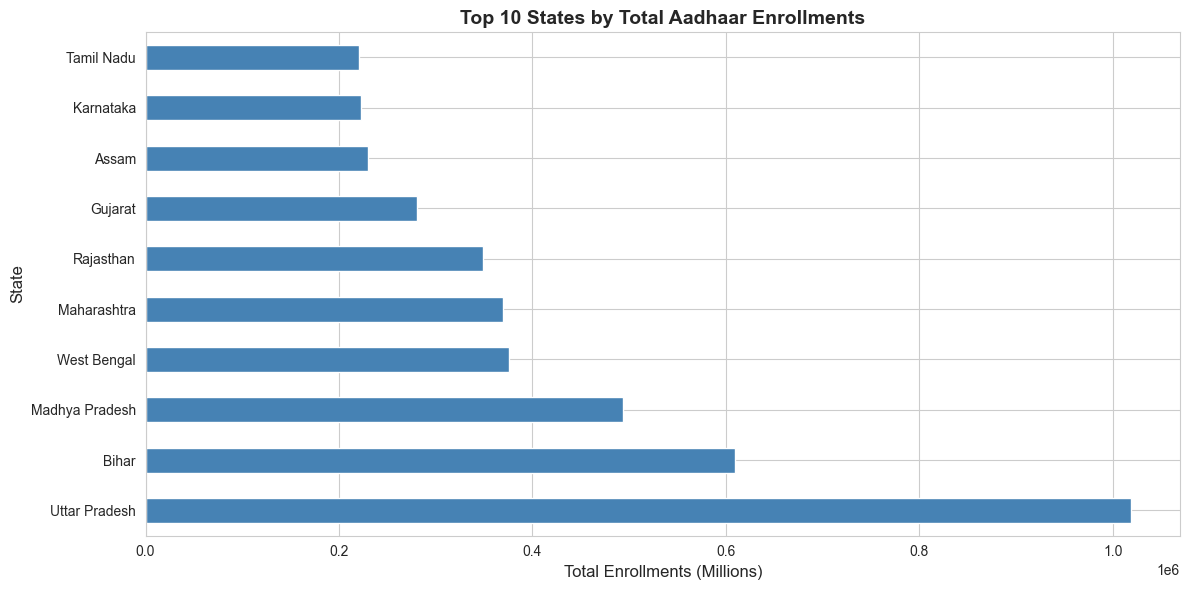

 Chart saved: 01_top_states_enrollment.png


In [16]:
# Top 10 states by total enrollments
top_states = df_district_master.groupby('state')['total_enrollments'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_states.plot(kind='barh', color='steelblue')
plt.title('Top 10 States by Total Aadhaar Enrollments', fontsize=14, weight='bold')
plt.xlabel('Total Enrollments (Millions)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'figures', '01_top_states_enrollment.png'), dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved: 01_top_states_enrollment.png")

### 6.3 Age Distribution Analysis

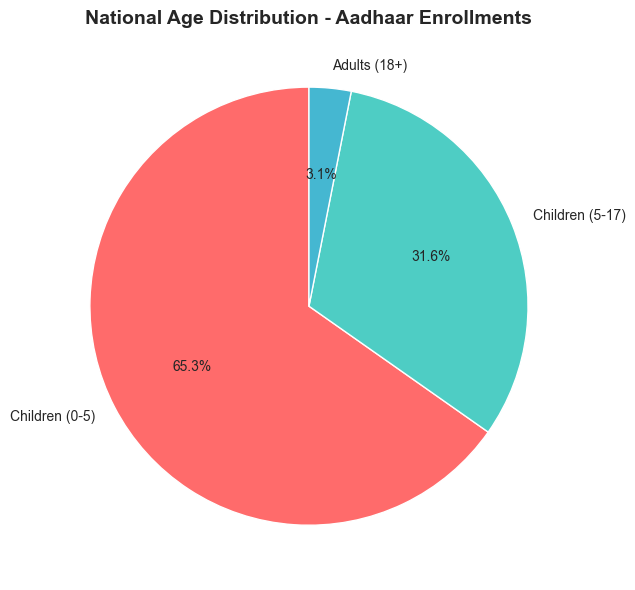

 Chart saved: 01_age_distribution.png

Age Distribution:
  Children (0-5): 3,546,965 (65.3%)
  Children (5-17): 1,720,384 (31.6%)
  Adults (18+): 168,353 (3.1%)


In [17]:
# National age distribution
age_distribution = {
    'Children (0-5)': df_enrol['age_0_5'].sum(),
    'Children (5-17)': df_enrol['age_5_17'].sum(),
    'Adults (18+)': df_enrol['age_18_greater'].sum()
}

plt.figure(figsize=(10, 6))
plt.pie(age_distribution.values(), labels=age_distribution.keys(), autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], startangle=90)
plt.title('National Age Distribution - Aadhaar Enrollments', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'figures', '01_age_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved: 01_age_distribution.png")
print(f"\nAge Distribution:")
for age_group, count in age_distribution.items():
    print(f"  {age_group}: {count:,} ({count/sum(age_distribution.values())*100:.1f}%)")

## 7. Save Cleaned Data

### 7.1 Export Processed Datasets

In [18]:
# Save cleaned individual datasets
df_enrol.to_csv(os.path.join(OUTPUT_DIR, 'tables', 'cleaned_enrolment.csv'), index=False)
df_demo.to_csv(os.path.join(OUTPUT_DIR, 'tables', 'cleaned_demographic.csv'), index=False)
df_bio.to_csv(os.path.join(OUTPUT_DIR, 'tables', 'cleaned_biometric.csv'), index=False)

# Save master district dataset
df_district_master.to_csv(os.path.join(OUTPUT_DIR, 'tables', 'master_district_data.csv'), index=False)

print(" All cleaned datasets saved:")
print(f"  - cleaned_enrolment.csv ({len(df_enrol):,} records)")
print(f"  - cleaned_demographic.csv ({len(df_demo):,} records)")
print(f"  - cleaned_biometric.csv ({len(df_bio):,} records)")
print(f"  - master_district_data.csv ({len(df_district_master):,} records)")

 All cleaned datasets saved:
  - cleaned_enrolment.csv (1,006,029 records)
  - cleaned_demographic.csv (2,071,700 records)
  - cleaned_biometric.csv (1,861,108 records)
  - master_district_data.csv (1,045 records)


---

## Notebook 01 Complete

### Summary
- Loaded 5M+ records from 3 datasets
- Cleaned and standardized data
- Created derived features
- Integrated into master district dataset
- Generated initial visualizations
- Saved processed data

### Next Steps
**Notebook 02:** Exploratory Data Analysis
- Geographic exclusion mapping
- Demographic vulnerability profiling
- Temporal trend analysis

---

**Execution Time:** ~5-10 minutes  
**Output Files:** 4 CSV + 2 PNG charts  
**Status:** Ready for EDA